In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#### 1. Функция, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv и на основании дополнительных параметров пересчитывать метрики.

In [5]:
def metrics(url):
    
    groups = pd.read_csv(f'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/LIE6fUfbD7belQ', sep=';')
    groups_add = pd.read_csv(f'https://getfile.dokpub.com/yandex/get/{url}')
    active_studs = pd.read_csv(f'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/9ExyNormZbelyg')
    checks = pd.read_csv(f'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/H-GJTo5Mx4Ld-g', sep=';')
    
    # Сделаем датафрейм
    df_g = groups.append(groups_add, ignore_index=True).rename(columns={'id':'student_id'})
    df_c = active_studs.merge(checks, how='outer', on='student_id').fillna(0)
    df = df_c.merge(df_g, how='left', on='student_id').fillna(0).rename(columns={'rev':'Revenue'})
    
    # Ещё один для расчета метрик
    df_1 = df.query('Revenue>0').groupby('grp', as_index=False).sum()\
        .assign(Paying_users=df.query('Revenue>0').groupby('grp', as_index=False).count()['Revenue'])\
        .assign(Total_users=df.groupby('grp', as_index=False).count()['student_id'])
    
    # Рассчитаем метрики
    df_2 = df_1\
        .assign(ARPPU=(df_1['Revenue']/df_1['Paying_users']).round(2))\
        .assign(CR=(df_1['Paying_users']/df_1['Total_users']).round(3))\
        [['grp', 'ARPPU', 'CR']]
    return df_2

In [6]:
metrics = metrics('https://disk.yandex.ru/d/qgQpmgvjemOJFw')
metrics

C:\Users\merabi\AppData\Local\Temp\ipykernel_7872\939634678.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_g = groups.append(groups_add, ignore_index=True).rename(columns={'id':'student_id'})


,grp,ARPPU,CR
0,A,860.71,0.068
1,B,1108.82,0.063


### 2. Функция, которая будет строить графики по получаемым метрикам.

In [7]:
def visual(metrics_data):
    
    fig, ax = plt.subplots(1, 2)
    
    sns.barplot(ax=ax[1], data = metrics_data, x = 'grp', y = 'ARPPU', color = 'royalblue')\
                .set(xlabel='Groups', ylabel='', title = 'ARPPU')
    sns.barplot(ax=ax[0], data = metrics_data, x = 'grp', y = 'CR', color = 'royalblue')\
                .set(xlabel='Groups', ylabel='', title = 'CR')
    sns.despine()

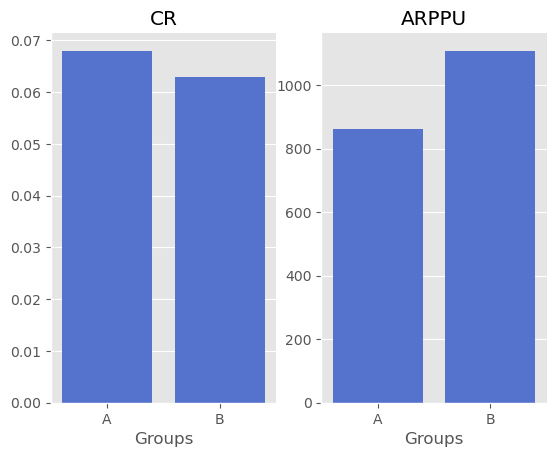

In [8]:
visual(metrics)